In [1]:
import tensorflow as tf
from tensorflow.keras.layers import RNN
from tensorflow.keras.models import Sequential

import torch

In [ ]:
class IRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(IRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size,
                          nonlinearity='relu', batch_first=True, bias=True)
        self.output_weights = nn.Linear(hidden_size, output_size)

        # Parameters initialization
        self.rnn.state_dict()['weight_hh_l0'].copy_(torch.eye(hidden_size))
        self.rnn.bias_ih_l0.data.fill_(0)
        self.rnn.bias_hh_l0.data.fill_(0)
        self.rnn.state_dict()['weight_ih_l0'].copy_(
            torch.randn(hidden_size, input_size) / hidden_size)

    def forward(self, inp):
        _, hnn = self.rnn(inp)
        out = self.output_weights(hnn[0])
        return out

In [ ]:
model = Sequential()
model.add(RNN())

# Sigmoid

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

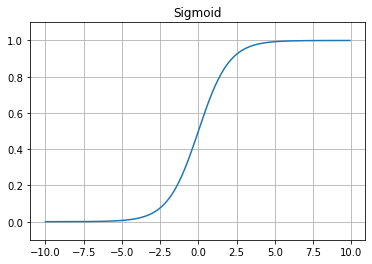

In [22]:
x = np.arange(-10.0, 10.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.ylim(-0.1, 1.1)
plt.title('Sigmoid')
plt.show()

# Tanh

In [24]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

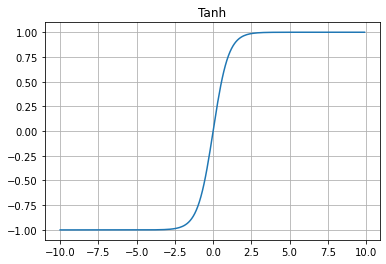

In [27]:
x = np.arange(-10.0, 10.0, 0.1)
y = tanh(x)

plt.plot(x, y)
plt.grid()
plt.ylim(-1.1, 1.1)
plt.title('Tanh')
plt.show()

# Softmax

In [28]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [34]:
a = np.array([0.3, 2.9, 4.0])

print(np.exp(a))
print(softmax(a))
print(sum(softmax(a)))

[ 1.34985881 18.17414537 54.59815003]
[0.01821127 0.24519181 0.73659691]
1.0


# ReLU
- The sigmoid and hyperbolic tangent activation functions cannot be used in networks with many layers due to the vanishing gradient problem.
- The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.
- The rectified linear activation is the default activation when developing multilayer Perceptron and convolutional neural networks.

In [3]:
def relu(x):
    return max(0.0, x)

In [4]:
x = 1.0
print('relu(%.1f) is %.1f' % (x, relu(x)))

relu(1.0) is 1.0


In [5]:
x = 1000.0
print('relu(%.1f) is %.1f' % (x, relu(x)))

relu(1000.0) is 1000.0


In [6]:
x = 0.0
print('relu(%.1f) is %.1f' % (x, relu(x)))

relu(0.0) is 0.0


In [7]:
x = -1.0
print('relu(%.1f) is %.1f' % (x, relu(x)))

relu(-1.0) is 0.0


In [8]:
x = -1000.0
print('relu(%.1f) is %.1f' % (x, relu(x)))

relu(-1000.0) is 0.0


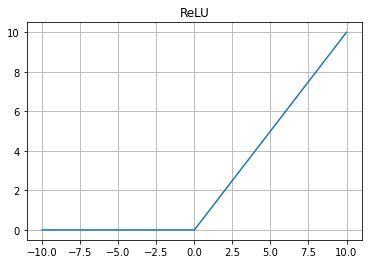

In [13]:
series_in = [x for x in range(-10, 11)]
series_out = [relu(x) for x in series_in]

plt.plot(series_in, series_out)
plt.title('ReLU')
plt.grid()
plt.show()

- The derivative of the rectified linear function is also easy to calculate. Recall that the derivative of the activation function is required when updating the weights of a node as part of the backpropagation of error.